<a href="https://colab.research.google.com/github/choisangh/fhqhxm114/blob/main/online_retail(KMeans).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://blog.kakaocdn.net/dn/d8Bc1j/btrv5nyalQ3/7ftMKcG5giA1kIpkPsyoY0/img.png"></img>

# DATA LOAD

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings(action='ignore')


#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()

In [66]:
# colab
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [67]:
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/comp/online_retail_k/dataset/OnlineRetail.csv',
               encoding='unicode_escape',parse_dates=['InvoiceDate']) #날짜 datetime으로 처리 
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [68]:
print(df.shape)
df.info()

(541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


* InvoiceNo object -> int64
* InvoiceDate object -> datetime64[ns] 타입 변환
* CustomerID float -> int64
* Country2 object -> int64 [라벨인코딩]
* CustomerID 결측 DROP

# 데이터 전처리

In [69]:
df[df['InvoiceNo'].str.contains('A')==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [70]:
df=df.dropna() #결측치 제거
#df['InvoiceNo']=df['InvoiceNo'].astype('category').cat.codes #문자포함되었기 때문에 범주화
df['InvoiceNo']=df['InvoiceNo'].str.extract('(\d+)').astype('int') #문자 제외하고 타입변경
df['CustomerID']=df['CustomerID'].astype('int') #float->int
#df['Country']=df['Country'].astype('category').cat.codes #범주화
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  int64         
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 27.9+ MB


## Country
* United Kingdom에 맞추고 나머지 Drop

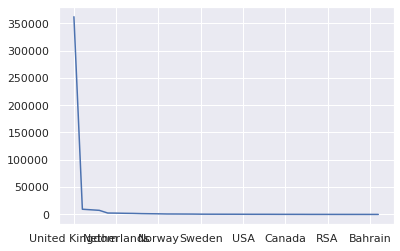

In [71]:
df['Country'].value_counts().plot()

In [72]:
df=df[df['Country']=='United Kingdom'] #United Kingdom 빼고 drop
df=df.drop('Country',axis=1)

In [73]:
df.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000,361878.000000
mean,560631.447435,11.077029,3.256007,15547.871368
std,13166.072218,263.129266,70.654731,1594.402590
min,536365.000000,-80995.000000,0.000000,12346.000000
25%,549169.000000,2.000000,1.250000,14194.000000
50%,561884.000000,4.000000,1.950000,15514.000000
75%,572282.000000,12.000000,3.750000,16931.000000
max,581586.000000,80995.000000,38970.000000,18287.000000


## Qunatity
* 거래량이 (-) 데이터 삭제

In [74]:
df[df['Quantity']<0].shape

(7533, 7)

In [75]:
df=df[df['Quantity']>0]
df.shape

(354345, 7)

## UnitPrice
* 거래대금 0 데이터 삭제

In [76]:
df[df['UnitPrice']==0].shape

(24, 7)

In [77]:
df=df[df['UnitPrice']!=0]
df.shape

(354321, 7)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354321 entries, 0 to 541893
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354321 non-null  int64         
 1   StockCode    354321 non-null  object        
 2   Description  354321 non-null  object        
 3   Quantity     354321 non-null  int64         
 4   InvoiceDate  354321 non-null  datetime64[ns]
 5   UnitPrice    354321 non-null  float64       
 6   CustomerID   354321 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 21.6+ MB


# RFM
* 가치있는 고객을 추출해내어 이를 기준으로 고객을 분류할 수 있는 매우 간단하면서도 유용하게 사용될 수 있는 방법으로 알려져 있어 마케팅에서 가장 많이 사용되는 분석기법<br><br>
* R (Recency)  :  최근 (InvoiceDate)
* F (Frequency) : 빈도 (InvoiceNo, StockCode) -- 상품지향 //사용자면 CustomerID
* M (Monetary) : 수량 ( Quantity*UnitPrice)


## R (Recency) : 최근 (InvocieDate)

In [79]:
df['InvoiceDate'].min(), df['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

In [80]:
df['day_diff']=df['InvoiceDate'].max()-df['InvoiceDate']

In [81]:
df['day_diff']=df['day_diff'].apply(lambda x: x.days+1)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,day_diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,374
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,374
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,374
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,374
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,374


In [82]:
df=df.set_index('InvoiceDate')
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,day_diff
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,374
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850,374
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,374
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,374
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,374


## F (Frequency) : 빈도 (InvoiceNo, StockCode)

In [83]:
df[['InvoiceNo','StockCode']].value_counts().head()

InvoiceNo  StockCode
555524     22698        20
           22697        12
572861     22775         8
578289     23395         7
572344     M             7
dtype: int64

In [84]:
df[['InvoiceNo','StockCode']].value_counts().describe()

count    344435.000000
mean          1.028702
std           0.188498
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          20.000000
dtype: float64

## M (Monetary) : 수량 ( Quantity*UnitPrice)

In [85]:
df['Monetary'] = df['Quantity']*df['UnitPrice']
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,day_diff,Monetary
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,374,15.3


# User별 RFM 분석

* R : day_diff : max
* F : InvocieNo count
* M : monetary : sum

In [86]:
df["CustomerID"].value_counts()

17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
         ... 
17752       1
16742       1
13120       1
16144       1
17956       1
Name: CustomerID, Length: 3920, dtype: int64

In [87]:
R=df.groupby("CustomerID")["day_diff"].max().to_frame().reset_index()
F=df["CustomerID"].value_counts().to_frame().reset_index()
M=df.groupby("CustomerID")["Monetary"].sum().to_frame().reset_index()

In [88]:
F.columns=['CustomerID','F']
F.head()

,CustomerID,F
0,17841,7847
1,14096,5111
2,12748,4595
3,14606,2700
4,15311,2379


In [89]:
RM = pd.merge(R, M, on = 'CustomerID', how = 'inner')
RFM = pd.merge(RM, F, on = 'CustomerID', how = 'inner')
RFM.columns=['CustomerID','R','M','F']
RFM.head()

,CustomerID,R,M,F
0,12346,326,77183.60,1
1,12747,369,4196.01,103
2,12748,374,33719.73,4595
3,12749,213,4090.88,199
4,12820,327,942.34,59


In [90]:
df2 =df.groupby('CustomerID').agg({'day_diff': 'max', 'InvoiceNo': 'count', 'Monetary': 'sum'}).reset_index()
df2.columns=['CustomerID','R','F','M']
df2.head()

,CustomerID,R,F,M
0,12346,326,1,77183.60
1,12747,369,103,4196.01
2,12748,374,4595,33719.73
3,12749,213,199,4090.88
4,12820,327,59,942.34


# 고객 군집 모델 - KMeans
* 휴면고객과 이탈 고객 및 충성고객(VIP) 구분
* ref : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmean#sklearn.cluster.KMeans


In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [92]:
df2.describe()

,CustomerID,R,F,M
count,3920.000000,3920.000000,3920.000000,3920.000000
mean,15562.059694,223.553571,90.388010,1864.385601
std,1576.594671,118.070706,217.808385,7482.817477
min,12346.000000,1.000000,1.000000,3.750000
25%,14208.750000,112.000000,17.000000,300.280000
50%,15569.500000,249.000000,41.000000,652.280000
75%,16913.250000,327.000000,99.250000,1576.585000
max,18287.000000,374.000000,7847.000000,259657.300000


* M의 경우 편차가 너무 커서 standard scaling
* CustomerID의 경우 nunique 값이 너무 많아서 군집시 방해되니까 다시 인덱스화

In [93]:
df2 = df2.set_index('CustomerID')
df2.head()

,R,F,M
CustomerID,,,
12346,326,1,77183.60
12747,369,103,4196.01
12748,374,4595,33719.73
12749,213,199,4090.88
12820,327,59,942.34


# # 검증 & 시각화

In [99]:
from sklearn.decomposition import PCA

In [94]:
def my_clustering(X):
    pca = PCA(n_components=2, random_state=1234) # 주성분을 몇개로 할지 결정
    pca_X = pca.fit_transform(X)

    p,axes = plt.subplots(1,5, figsize=(20,5))

    for i,n in enumerate([2,3,4,5,6]):
        model=KMeans(n_clusters=n, random_state=1234)
        model.fit(pca_X)
        pred = model.predict(pca_X) #cluster_label
        print(f"SCORE: {silhouette_score(pca_X, pred)}")

        sns.scatterplot(x=pca_X[:,0], y=pca_X[:,1], hue=pred, ax=axes[i])
    # sns.scatterplot(x=cx, y=cy, ax=axes[0])
    plt.show()

## 원본

SCORE: 0.9747982262815944
SCORE: 0.957957997054988
SCORE: 0.8410929129412178
SCORE: 0.8077960804950076
SCORE: 0.809183839674747


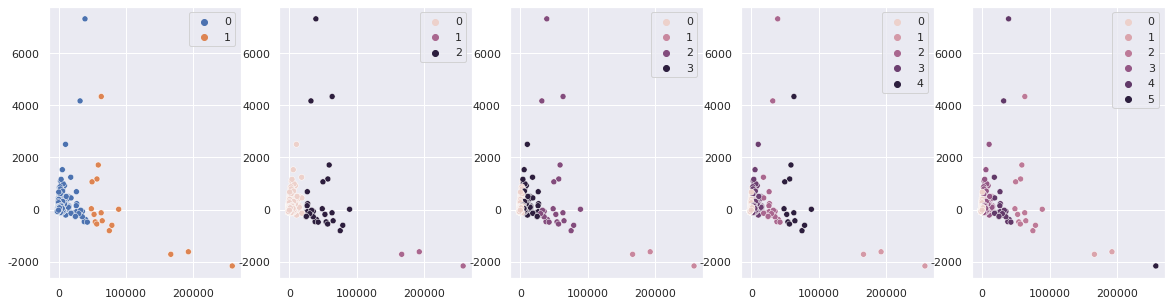

In [96]:
my_clustering(df2[['R','F','M']])

## Standard 스케일링

SCORE: 0.5314965335550905
SCORE: 0.5538337536914346
SCORE: 0.5786742756181078
SCORE: 0.49059096253368967
SCORE: 0.4995843304980658


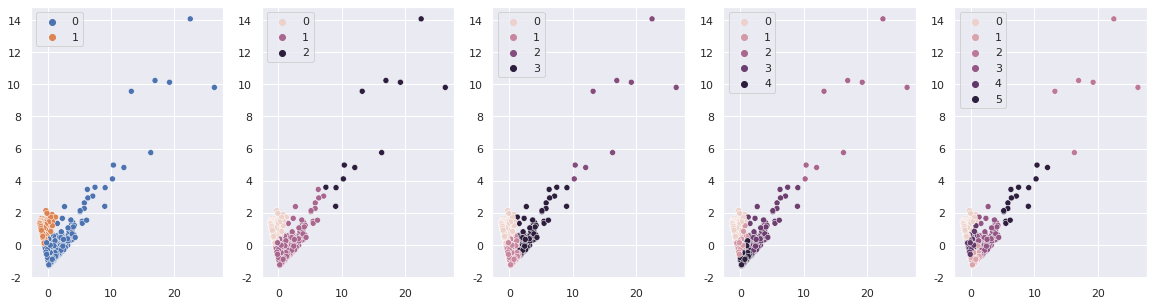

In [97]:
scaler = StandardScaler()
rfm_scaler = scaler.fit_transform(df2)
rfm_scaler[:3]
my_clustering(rfm_scaler)

## 로그 스케일링

SCORE: 0.41939576129791634
SCORE: 0.44373571847617027
SCORE: 0.39885737962498
SCORE: 0.40216261497174693
SCORE: 0.3757022711668825


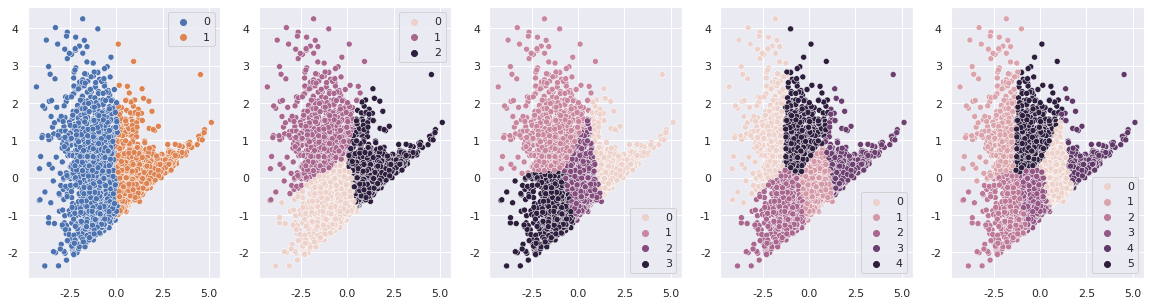

In [98]:
df2['R']=np.log1p(df2['R'])
df2['F']=np.log1p(df2['F'])
df2['M']=np.log1p(df2['M'])
rfm_scaler = scaler.fit_transform(df2)
my_clustering(rfm_scaler)